In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df=pd.read_csv('loan (1).csv')

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [17]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


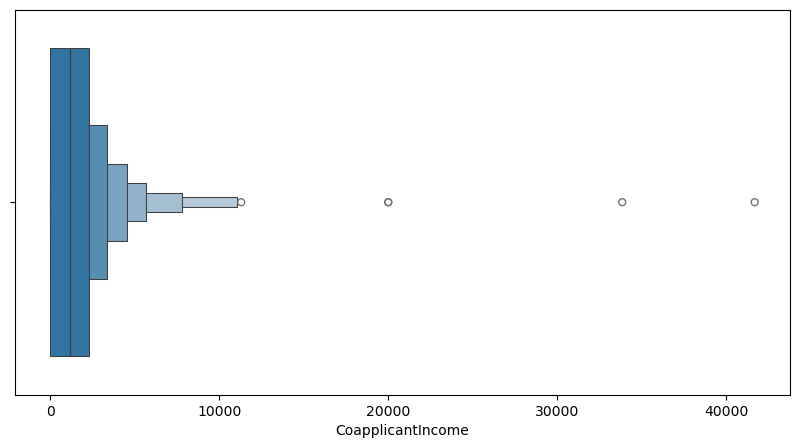

In [18]:
plt.figure(figsize=(10,5))
sns.boxenplot(x='CoapplicantIncome',data=df)
plt.show()

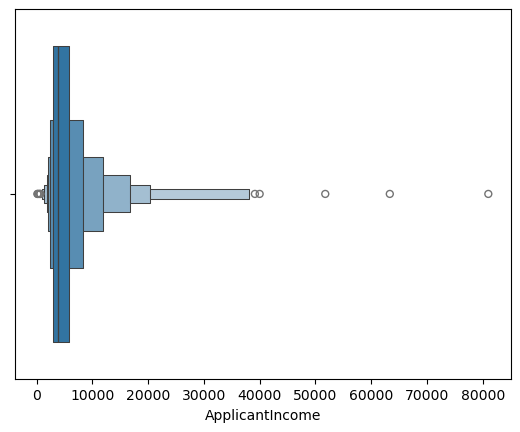

In [19]:
sns.boxenplot(x='ApplicantIncome',data=df)
plt.show()

In [20]:
l=[2,3,6,7,8,9,2,4]
sum(l)/len(l)

5.125

In [21]:
l=[2,3,6,7,8,9,2,4,100]
sum(l)/len(l)

15.666666666666666

# How to Remove Outliers 
1) IQR(Inter Quartile Range)
2) Z-Score

# IQR(Inter Quartile Range)

## 📊 IQR Method (Outlier detection & removal)

**IQR = Interquartile Range**
It measures the spread of the middle 50% of data and is very effective for detecting outliers, especially when data is skewed.

---

### 1️⃣ Formula

IQR=Q3−Q1

Where:

* **Q1** = 25th percentile (lower quartile)
* **Q3** = 75th percentile (upper quartile)

### Outlier boundaries:

1) Lower limit= Q1 − 1.5 × IQR
2) Upper limit= 𝑄3 + 1.5 × 𝐼𝑄𝑅

Values outside these limits are considered outliers.

---

## 2️⃣ How to remove outliers (step-by-step)

1. Find Q1 (25th percentile)
2. Find Q3 (75th percentile)
3. Compute IQR = Q3 − Q1
4. Calculate lower and upper bounds
5. Remove values outside the bounds

---

## 3️⃣ Python implementation

### Example dataset

```python
import pandas as pd

data = {'Marks': [50, 52, 55, 58, 60, 62, 65, 120]}
df = pd.DataFrame(data)
```

### Apply IQR method

```python
Q1 = df['Marks'].quantile(0.25)
Q3 = df['Marks'].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# remove outliers
df_clean = df[(df['Marks'] >= lower_limit) & (df['Marks'] <= upper_limit)]

print(df_clean)
```

---

## 4️⃣ When to use IQR method

Use when:

* Data is **skewed**
* Not normally distributed
* Want a **robust** method (not affected by extreme values)

Better than Z-score when:

* There are already extreme outliers
* Dataset is small

---

## 5️⃣ Z-score vs IQR (quick difference)

| Feature               | Z-score             | IQR         |
| --------------------- | ------------------- | ----------- |
| Based on              | Mean & Std dev      | Quartiles   |
| Works best for        | Normal distribution | Skewed data |
| Sensitive to outliers | Yes                 | No          |
| Robust method         | No                  | Yes         |

---

## 6️⃣ Interview definition (short)

**IQR outlier removal:**
A statistical method that identifies outliers using quartiles. Any value below (Q1 - 1.5×IQR) or above (Q3 + 1.5×IQR) is treated as an outlier and removed.


In [22]:
df.shape

(614, 13)

In [23]:
q1=df['CoapplicantIncome'].quantile(0.25)
q3=df['CoapplicantIncome'].quantile(0.75)


In [24]:
Iqr=q3-q1

In [25]:
min_range=q1-(1.5*Iqr)
max_range=q3+(1.5*Iqr)

min_range,max_range

(np.float64(-3445.875), np.float64(5743.125))

In [26]:
df_clean = df[(df['CoapplicantIncome'] >= min_range) & (df['CoapplicantIncome'] <= CoapplicantIncome)]

NameError: name 'CoapplicantIncome' is not defined

In [27]:

new_dataset=df[df['CoapplicantIncome']<=max_range]

In [28]:
new_dataset.shape

(596, 13)

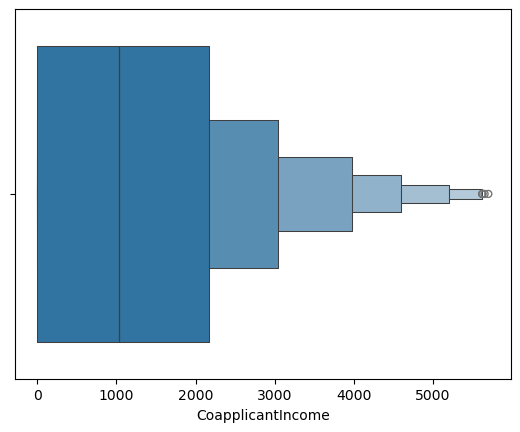

In [29]:
sns.boxenplot(x='CoapplicantIncome',data=new_dataset)
plt.show()

# **Z-Score**

### 📊 Z-Score method (Outlier detection & removal)

**Z-score** tells how far a value is from the mean in terms of standard deviations.

### 1️⃣ Formula

**Z=X−μ / σ**

Where:

* **X** = data point
* **μ** = mean of dataset
* **σ** = standard deviation

### 2️⃣ Rule to detect outliers

Common thresholds:

* |Z| > **3** → strong outlier (most used)
* |Z| > **2.5** → moderate outlier
* |Z| > **2** → strict filtering

---

## 3️⃣ How to remove outliers (step-by-step)

### Conceptual steps

1. Calculate mean
2. Calculate standard deviation
3. Compute Z-score for each value
4. Remove values where |Z| > threshold (usually 3)

---

## 4️⃣ Python implementation

### Using SciPy

```python
import pandas as pd
import numpy as np
from scipy import stats

# sample dataset
data = {'Marks': [50, 52, 55, 58, 60, 62, 65, 120]}
df = pd.DataFrame(data)

# calculate z-score
z_scores = stats.zscore(df['Marks'])

# remove outliers
df_clean = df[np.abs(z_scores) < 3]

print(df_clean)
```

---

### Without SciPy (manual)

```python
import pandas as pd
import numpy as np

data = {'Marks': [50, 52, 55, 58, 60, 62, 65, 120]}
df = pd.DataFrame(data)

mean = np.mean(df['Marks'])
std = np.std(df['Marks'])

# calculate z-score
df['z_score'] = (df['Marks'] - mean) / std

# remove outliers
df_clean = df[np.abs(df['z_score']) < 3]

print(df_clean)
```

---

## 5️⃣ When to use Z-score method

Use when:

* Data is **normally distributed**
* Dataset is numeric
* Mean & standard deviation represent data well

Avoid when:

* Data is skewed
* Small datasets
* Presence of extreme values already affecting mean

---

## 6️⃣ Interview definition (short)

**Z-score outlier removal:**
A statistical technique where data points having Z-score greater than ±3 standard deviations from the mean are treated as outliers and removed from the dataset.


In [30]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [31]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [32]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


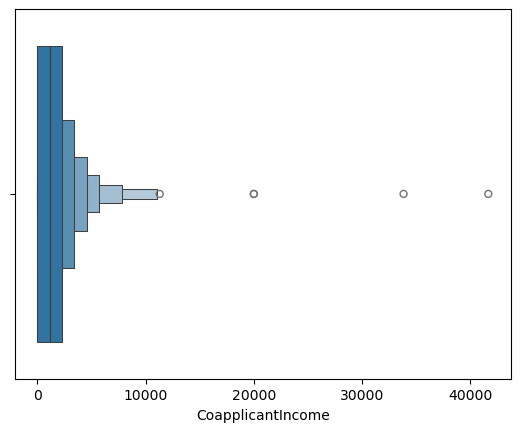

In [33]:
sns.boxenplot(x='CoapplicantIncome',data=df)
plt.show()

C:\Users\Classic\AppData\Local\Temp\ipykernel_6756\1457747018.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'])


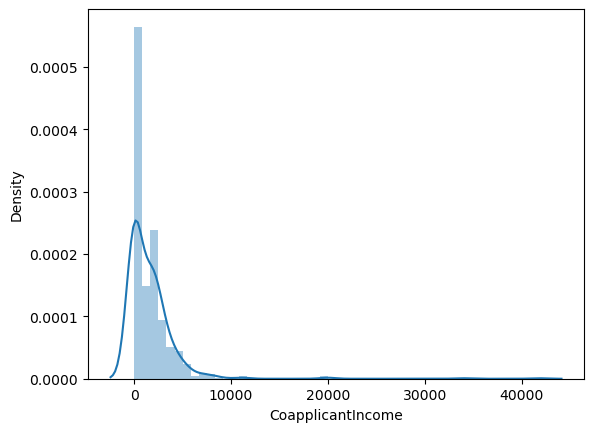

In [36]:
sns.distplot(df['CoapplicantIncome'])
plt.show()

In [37]:
min_range=df['CoapplicantIncome'].mean()-(3*df['CoapplicantIncome'].std())
max_range=df['CoapplicantIncome'].mean()+(3*df['CoapplicantIncome'].std())

In [38]:
min_range,max_range

(np.float64(-7157.499309645475), np.float64(10399.990905699677))

In [39]:
new_data=df[df['CoapplicantIncome']<=max_range]

In [54]:
new_data.shape

(608, 13)

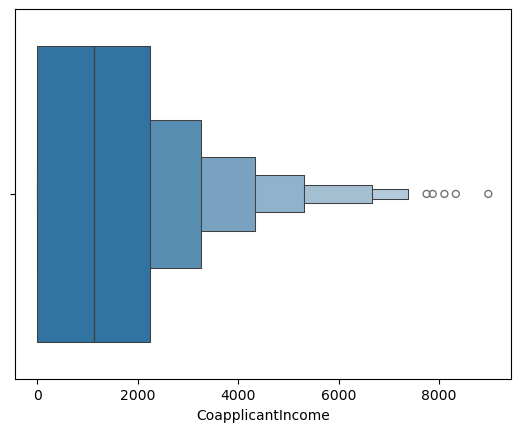

In [42]:
sns.boxenplot(x='CoapplicantIncome',data=new_data)
plt.show()

In [48]:
z_score=(df['CoapplicantIncome']-df['CoapplicantIncome'].mean())/(df['CoapplicantIncome'].std())

In [49]:
df['z_score']=z_score

In [50]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,z_score
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,-0.554036
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.038700
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.554036
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0.251774
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,-0.554036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,-0.554036
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,-0.554036
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,-0.472019
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,-0.554036


In [51]:
df[df['z_score']<3]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,z_score
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,-0.554036
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.038700
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.554036
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0.251774
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,-0.554036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,-0.554036
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,-0.554036
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,-0.472019
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,-0.554036


In [53]:
df[df['z_score']<3].shape

(608, 14)